In [ ]:
!pip install pmdarima
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
stock_data = pd.read_csv('dse_cp_MEGHNA.csv',sep=',', index_col='DATE', parse_dates=['DATE'], date_parser=dateparse).fillna(0)
stock_data
#stock_data.Date = pd.to_datetime(stock_data.Date - 25569, unit='D').dt.round('ms')
stock_data = stock_data.dropna()
print('shape of data' , stock_data.shape)
stock_data = stock_data.sort_values(by='DATE')
stock_data.head()

shape of data (245, 4)


<ipython-input-2-1ea88b990ba1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')


,#,TRADING CODE,CLOSEP*,YCP
DATE,,,,
2022-11-01,245,MEGHNALIFE,62.5,62.5
2022-11-02,244,MEGHNALIFE,63.5,62.5
2022-11-03,243,MEGHNALIFE,65.4,63.5
2022-11-06,242,MEGHNALIFE,67.3,65.4
2022-11-07,241,MEGHNALIFE,65.7,67.3


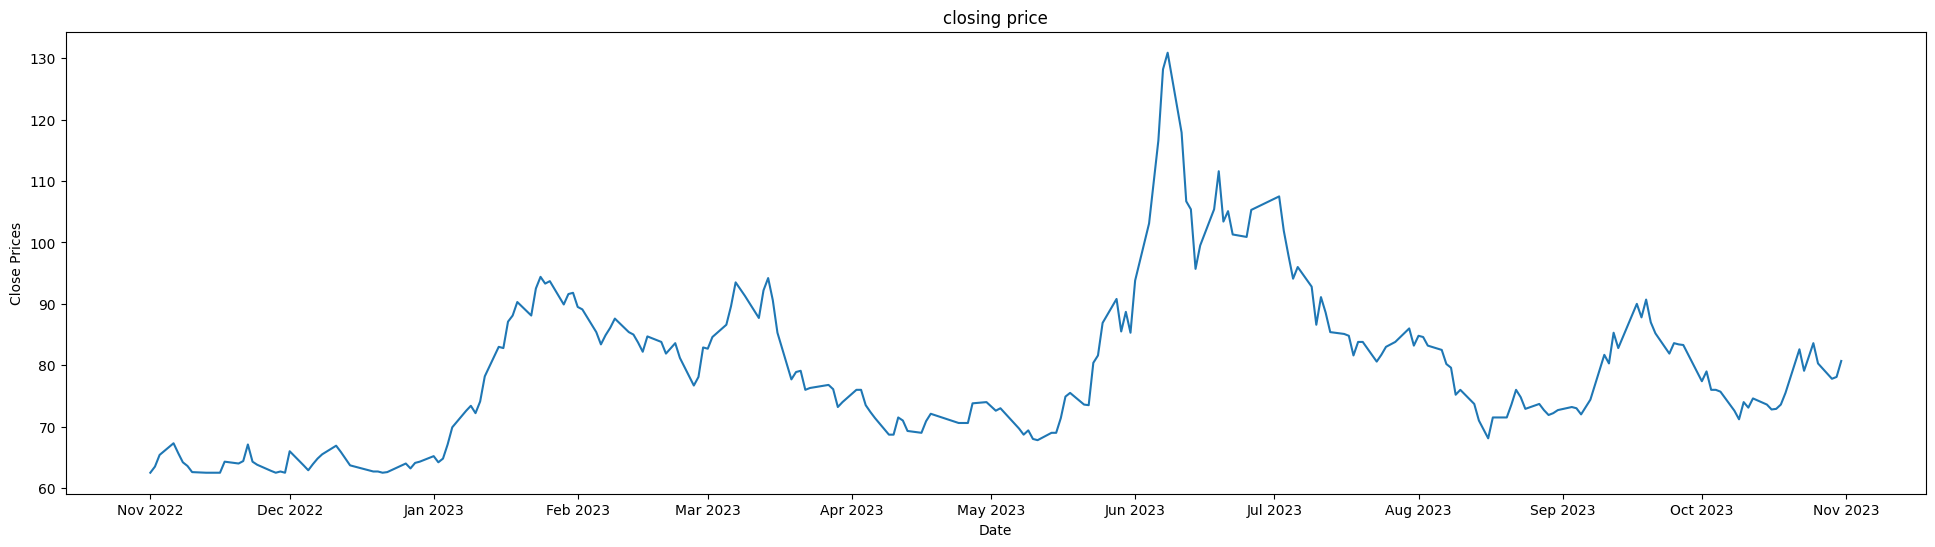

In [ ]:
import matplotlib.dates as mdates
plt.figure(figsize=(24,6))

plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['CLOSEP*'])
plt.title('closing price')
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.show()

In [ ]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("2. P-value : ",dftest[1])

In [ ]:
adf_test(stock_data['CLOSEP*'])

2. P-value :  0.1233348710922218


In [ ]:
df_close = stock_data['CLOSEP*']

In [ ]:
stock_data['price First Difference'] = df_close - df_close.shift(1)

In [ ]:
df_close.shift(1)

DATE
2022-11-01     NaN
2022-11-02    62.5
2022-11-03    63.5
2022-11-06    65.4
2022-11-07    67.3
              ... 
2023-10-25    79.1
2023-10-26    83.6
2023-10-29    80.3
2023-10-30    77.8
2023-10-31    78.1
Name: CLOSEP*, Length: 245, dtype: float64

In [ ]:
 adf_test(stock_data['price First Difference'].dropna())

2. P-value :  1.0415207801317602e-24


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

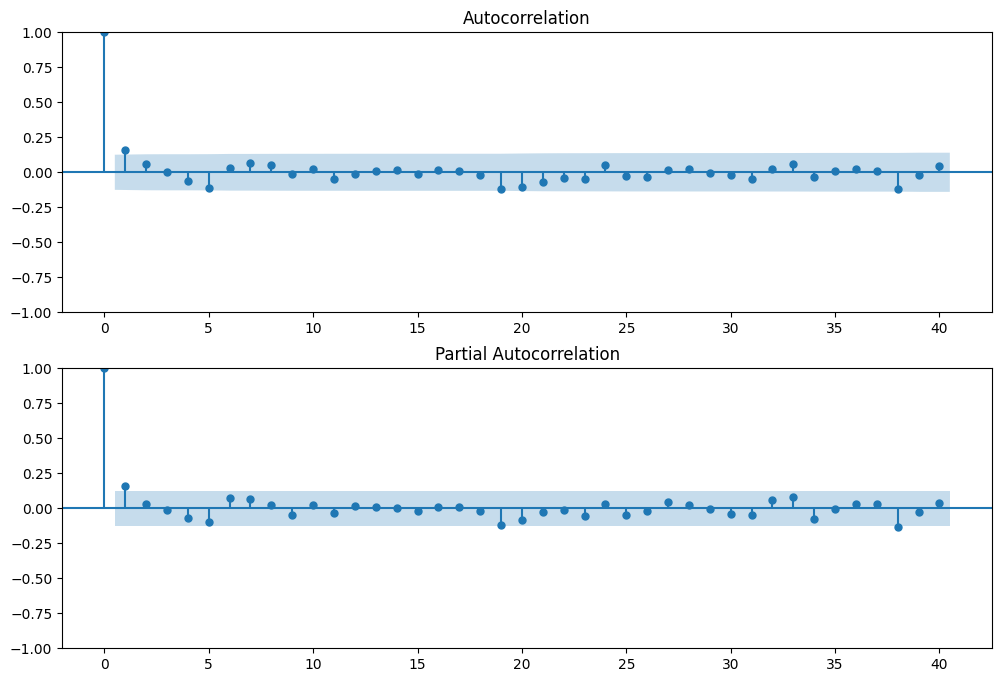

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data['price First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data['price First Difference'].dropna(),lags=40,ax=ax2)

<Axes: xlabel='DATE'>

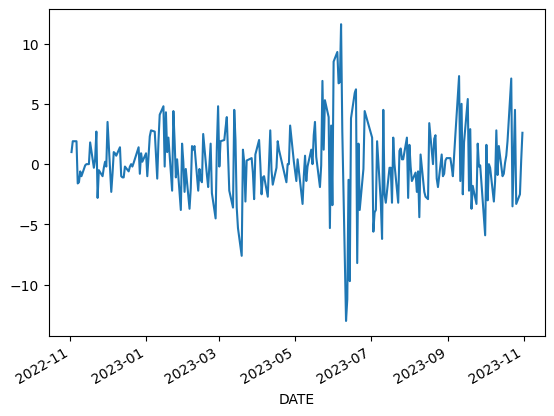

In [ ]:
stock_data['price First Difference'].plot()

# **90**

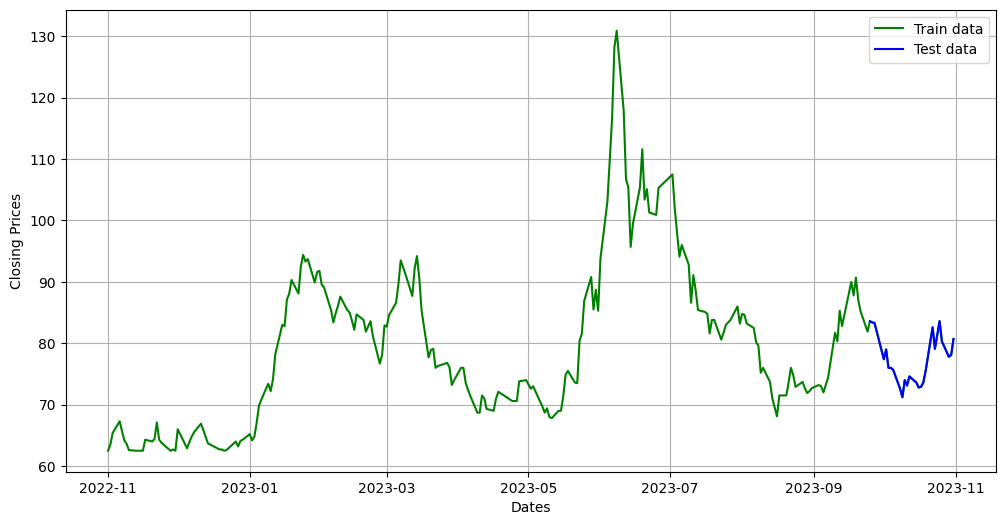

In [ ]:
train_data, test_data = df_close[3:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_close.dropna(), stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,0))
fitted = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-06',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-13', '2022-11-14',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-22',
               '2023-10-23', '2023-10-25', '2023-10-26', '2023-10-29',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='DATE', length=245, freq=None)


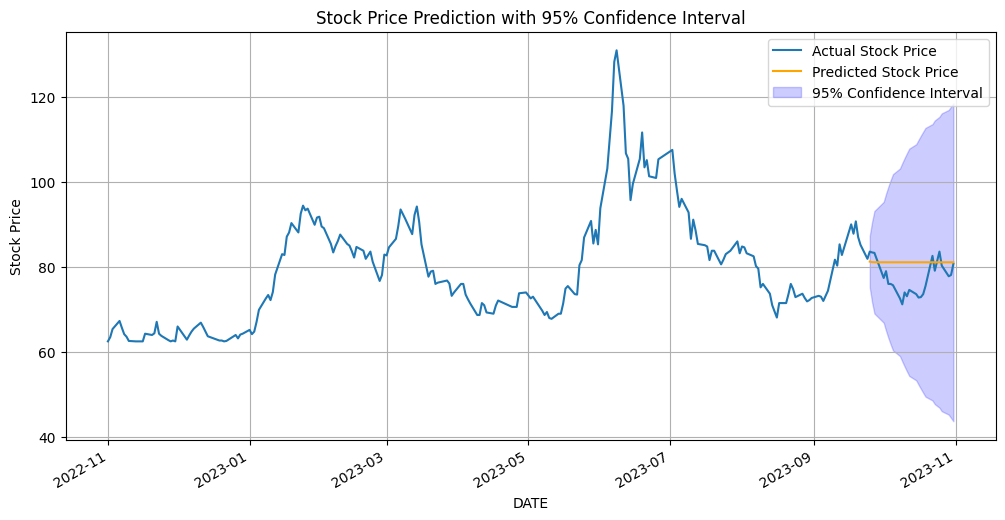

In [ ]:
import matplotlib.pyplot as plt

# Sort the stock_data DataFrame by the 'DATE' (or '#') column in ascending order


# Calculate indices
total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

# Confidence intervals
conf_ins = fitted.get_forecast(test).summary_frame()

# Create the plot with date labels on the x-axis and increased width
dates = stock_data.index
print(dates)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width (12) as needed
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 5.484917777136921
MAE: 4.743713602443463
MAPE: 0.06323244799914131


# **80**

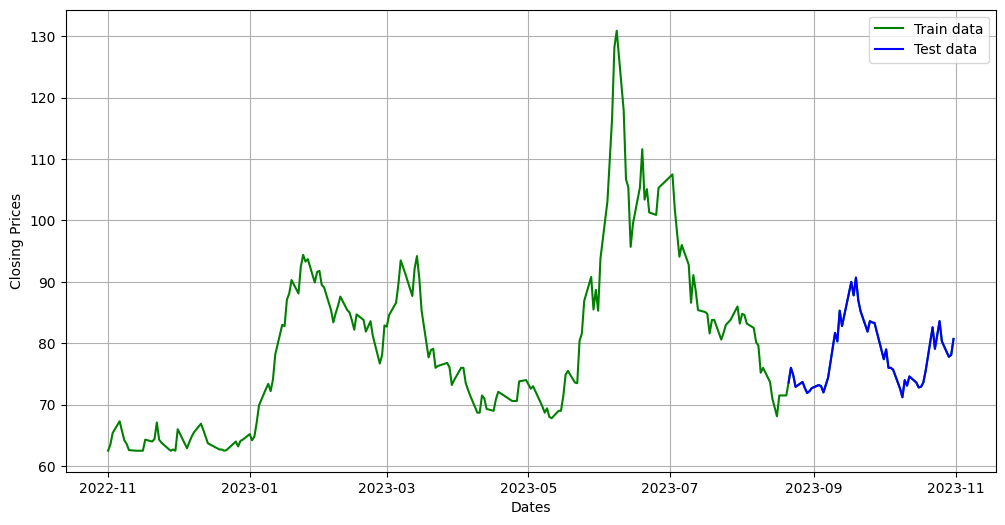

In [ ]:
train_data, test_data = df_close[3:int(len(df_close)*0.8)], df_close[int(len(df_close)*0.8):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_close.dropna(), stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,0))
fitted = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-06',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-13', '2022-11-14',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-22',
               '2023-10-23', '2023-10-25', '2023-10-26', '2023-10-29',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='DATE', length=245, freq=None)


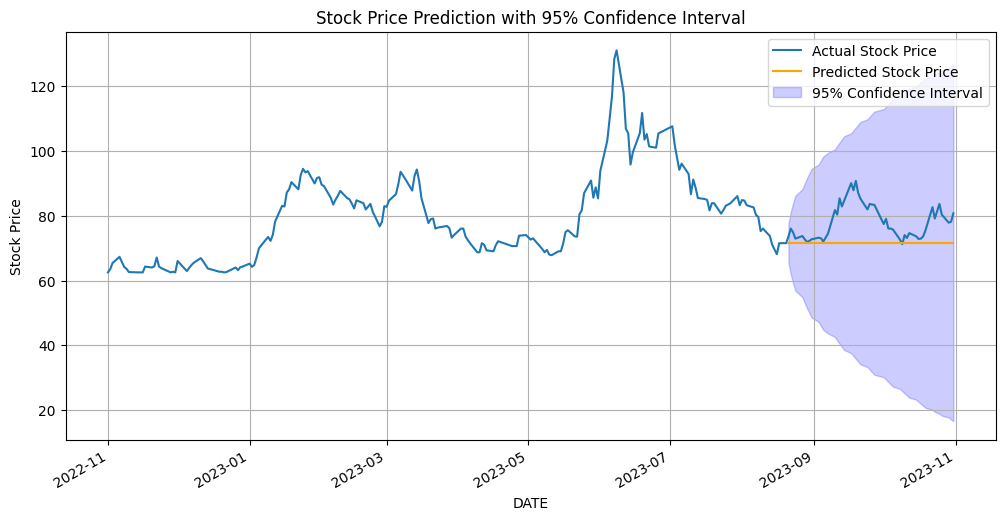

In [ ]:
import matplotlib.pyplot as plt

# Sort the stock_data DataFrame by the 'DATE' (or '#') column in ascending order


# Calculate indices
total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

# Confidence intervals
conf_ins = fitted.get_forecast(test).summary_frame()

# Create the plot with date labels on the x-axis and increased width
dates = stock_data.index
print(dates)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width (12) as needed
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 8.37993229722785
MAE: 6.489795918367346
MAPE: 0.07913010667511766


# **70**

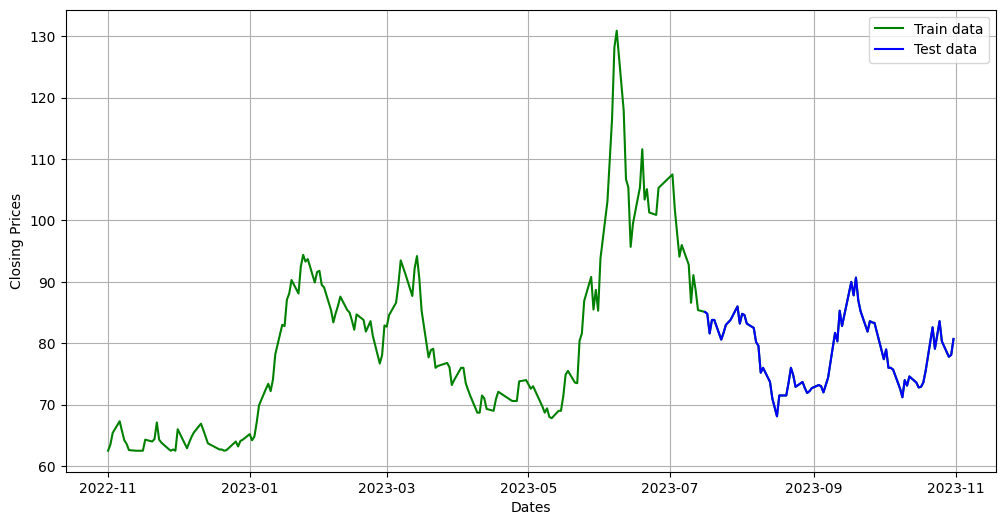

In [ ]:
train_data, test_data = df_close[3:int(len(df_close)*0.7)], df_close[int(len(df_close)*0.7):]
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_close.dropna(), stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,1,0))
fitted = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-06',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-13', '2022-11-14',
               ...
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-22',
               '2023-10-23', '2023-10-25', '2023-10-26', '2023-10-29',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='DATE', length=245, freq=None)


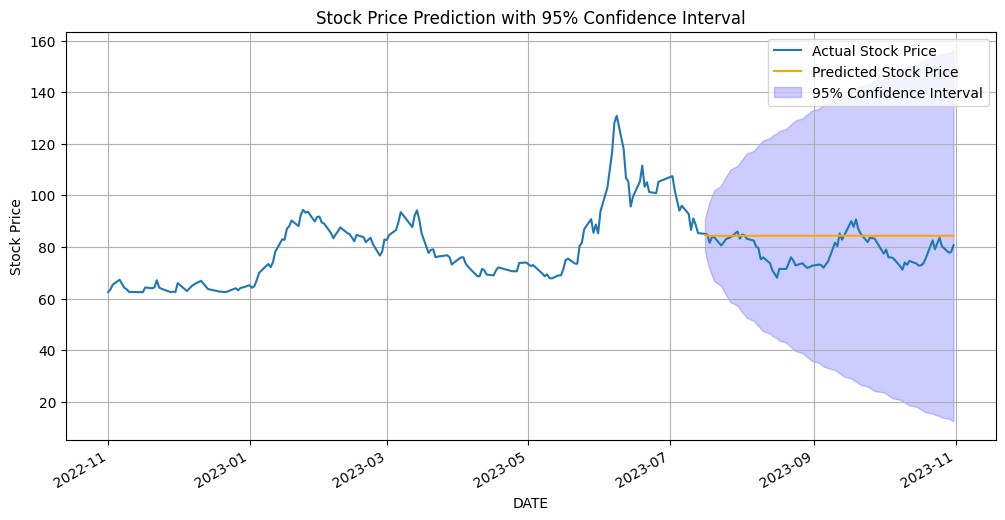

In [ ]:
import matplotlib.pyplot as plt

# Sort the stock_data DataFrame by the 'DATE' (or '#') column in ascending order


# Calculate indices
total = len(df_close)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

# Confidence intervals
conf_ins = fitted.get_forecast(test).summary_frame()

# Create the plot with date labels on the x-axis and increased width
dates = stock_data.index
print(dates)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width (12) as needed
ax.plot(dates, df_close.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 7.79598171300845
MAE: 6.290588411319607
MAPE: 0.08403112759852553


# **short**

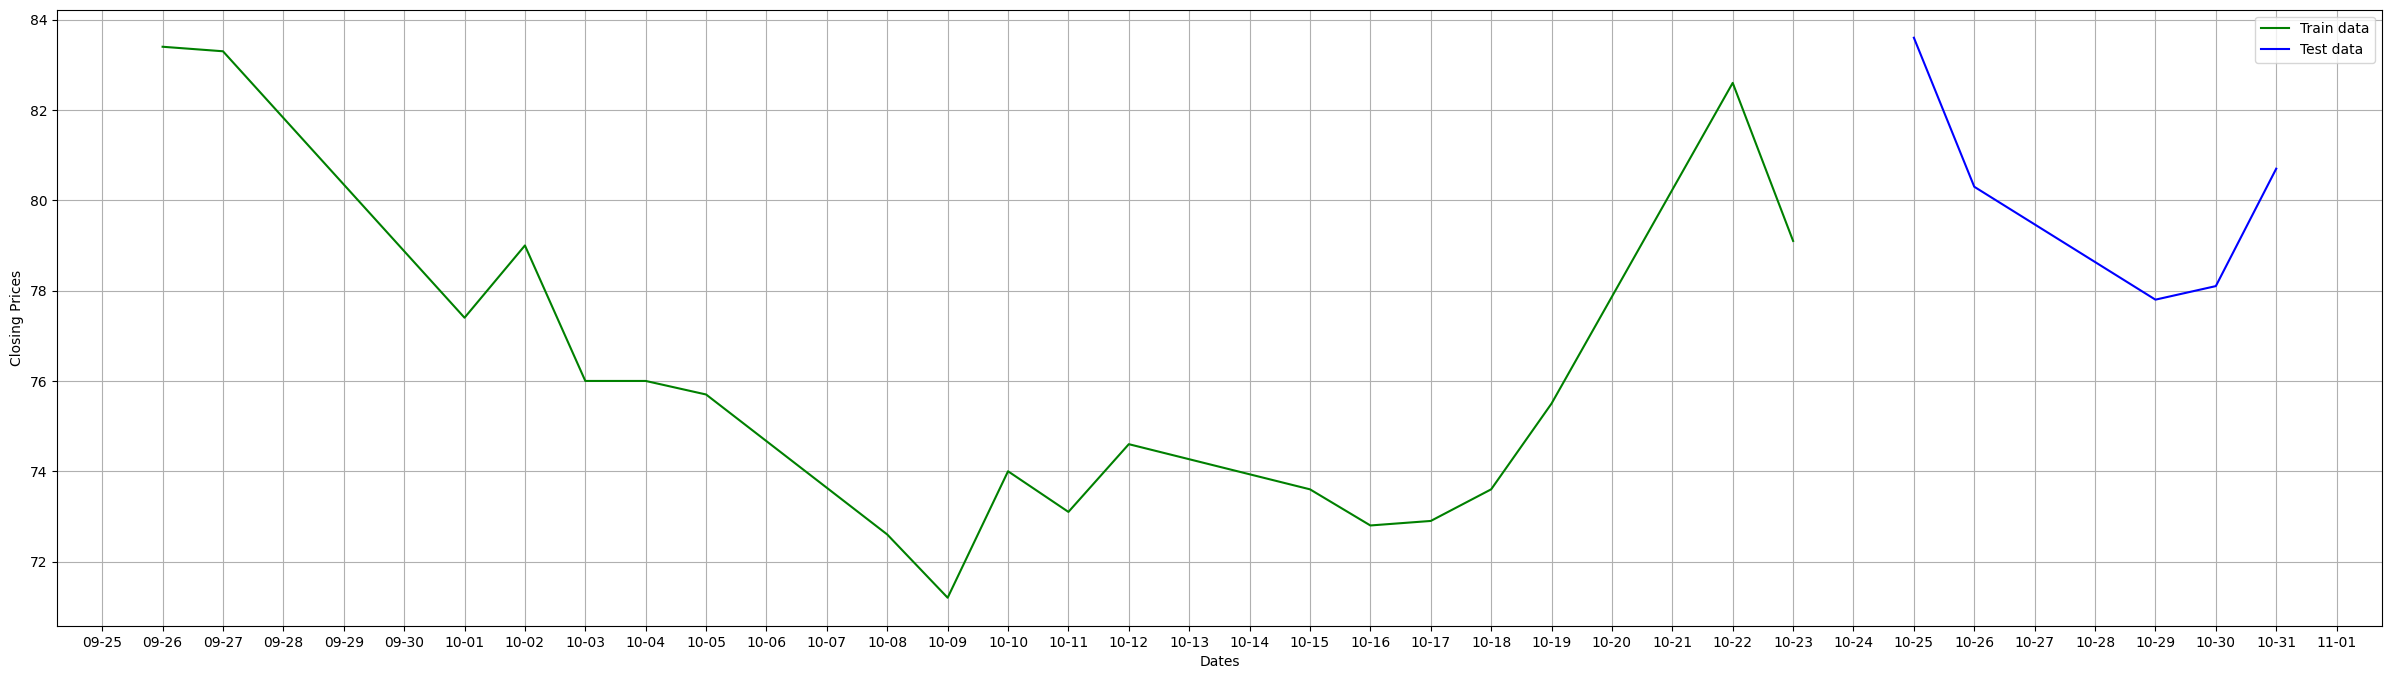

In [ ]:
stock_30 = stock_data[-30:]
last_month = df_close[-30:]
train_data = df_close[-24:-5]  # Select the last 25 days for training
test_data = df_close[-5:]     # Select the last 5 days for testing

plt.figure(figsize=(30, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')

date_format = mdates.DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.legend()

In [ ]:
import pmdarima as pm
auto_arima = pm.auto_arima(last_month, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(1, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("2. P-value : ",dftest[1])

In [ ]:
adf_test(df_close[-30:])

2. P-value :  0.42352481503981465


In [ ]:
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# # Split your data into training and validation sets
# validation_data = test_data

# # Define a range of orders to try
# p_values = [0, 1, 2]  # You can expand this range
# d_values = [1]      # You can expand this range
# q_values = [0, 1, 2, 3, 4]  # You can expand this range

# best_rmse = float("inf")
# best_model = None

# # Loop through different (p, d, q) combinations
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             try:
#                 model = ARIMA(train_data, order=(p, d, q))
#                 fitted = model.fit()
#                 forecast = fitted.forecast(steps=len(validation_data))
#                 rmse = np.sqrt(mean_squared_error(validation_data, forecast))

#                 if rmse < best_rmse:
#                     best_rmse = rmse
#                     best_model = fitted
#                     order = (p, d, q)
#                     print(f"Found a better model: (p, d, q) = {order}, RMSE = {rmse:.2f}")
#             except Exception as e:
#                 print(f"Error for (p, d, q) = ({p}, {d}, {q}): {e}")
#                 continue

# # Print the best model order and RMSE
# if best_model is not None:
#     print(f"Best (p, d, q): {order}, RMSE: {best_rmse:.2f}")
# else:
#     print("No valid ARIMA model found within the specified range.")


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1,0,1))
fitted = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_i

DatetimeIndex(['2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27',
               '2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04',
               '2023-10-05', '2023-10-08', '2023-10-09', '2023-10-10',
               '2023-10-11', '2023-10-12', '2023-10-15', '2023-10-16',
               '2023-10-17', '2023-10-18', '2023-10-19', '2023-10-22',
               '2023-10-23', '2023-10-25', '2023-10-26', '2023-10-29',
               '2023-10-30', '2023-10-31'],
              dtype='datetime64[ns]', name='DATE', freq=None)


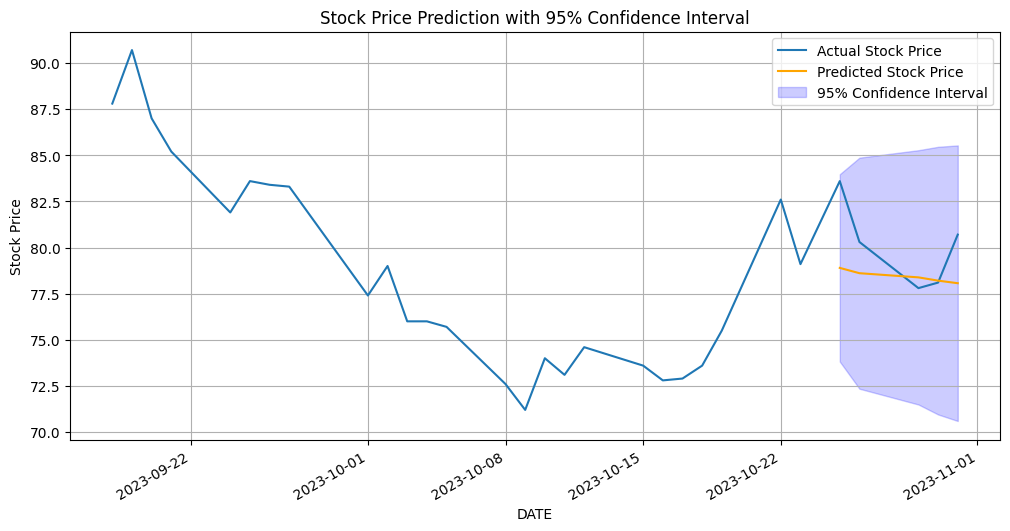

In [ ]:
import matplotlib.pyplot as plt

# Sort the stock_data DataFrame by the 'DATE' (or '#') column in ascending order
#stock_30.sort_values(by='', inplace=True)

# Calculate indices
total = len(last_month)
test = len(test_data)
train = total - test

result = fitted.forecast(test, alpha=0.05)

# Confidence intervals
conf_ins = fitted.get_forecast(test).summary_frame()

# Create the plot with date labels on the x-axis and increased width
dates = stock_30.index
print(dates)
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width (12) as needed
ax.plot(dates, last_month.values, label='Actual Stock Price')
ax.plot(dates[train:], result, label='Predicted Stock Price', color='orange')
ax.fill_between(dates[train:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
ax.set_xlabel('DATE')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Prediction with 95% Confidence Interval')
ax.legend()
fig.autofmt_xdate()
ax.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
test_data.mean()
rmse=sqrt(mean_squared_error(result,test_data))
print("RMSE:",rmse)

mae = mean_absolute_error(test_data, result)
print("MAE:", mae)

mape = mean_absolute_percentage_error(test_data, result)
print("MAPE:", mape)

RMSE: 2.5406945674602492
MAE: 1.9435080265855362
MAPE: 0.023762158827312065
